# Apple Stock Price Forecasting using Prophet
This notebook demonstrates time series analysis and forecasting of Apple Inc. (AAPL) stock prices using the Prophet library.
It downloads historical stock data, prepares it for modeling, fits a Prophet forecasting model, and visualizes the results.

## Step 1: Install Required Libraries
Uncomment and run the following line if you're running this notebook in Google Colab or an environment without the libraries installed.

In [1]:
# !pip install yfinance prophet matplotlib pandas

## Step 2: Import Libraries

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
%matplotlib inline

## Step 3: Download Historical Stock Data for Apple (AAPL)

In [3]:
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288584,24.757338,23.848709,24.746230,212818400
2015-01-05,23.604340,24.137520,23.417727,24.057543,257142000
2015-01-06,23.606558,23.866483,23.244438,23.668762,263188400
2015-01-07,23.937561,24.037532,23.704294,23.815373,160423600
2015-01-08,24.857309,24.915071,24.148623,24.266369,237458000


## Step 4: Prepare the Data for Prophet
Prophet requires a dataframe with two columns: 'ds' (date) and 'y' (value to forecast).

In [5]:
# Reset index to make 'Date' a column
data.reset_index(inplace=True)
# Check columns (optional - just to confirm)
print(data.columns)  # Should include 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
# Prepare dataframe for Prophet
df = data[['Date', 'Close']].copy()
df.columns = ['ds', 'y']
# Convert columns to proper types and clean data
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df.dropna(inplace=True)




MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


## Step 5: Visualize the Historical Closing Prices

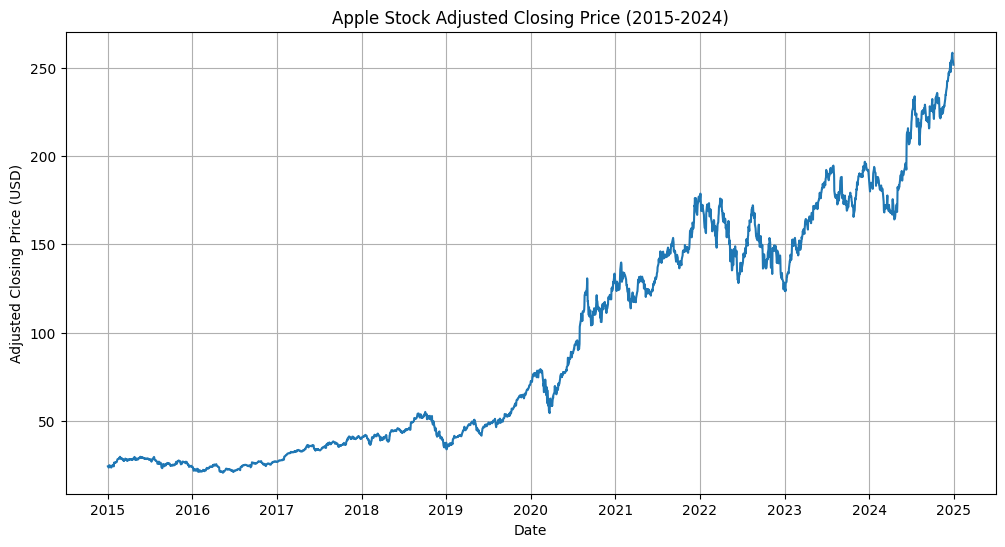

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'])
plt.title('Apple Stock Adjusted Closing Price (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.grid(True)
plt.show()

## Step 6: Initialize and Fit the Prophet Model

In [7]:
model = Prophet(daily_seasonality=True)
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdqg1vsz5/yl_pov0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdqg1vsz5/oz87zf_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66022', 'data', 'file=/tmp/tmpdqg1vsz5/yl_pov0i.json', 'init=/tmp/tmpdqg1vsz5/oz87zf_k.json', 'output', 'file=/tmp/tmpdqg1vsz5/prophet_modelvg_javwo/prophet_model-20250525102000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:20:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Step 7: Create Future Dates and Make Predictions
Predict for the next 180 days (about 6 months).

In [8]:
# Create future dataframe and make predictions
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)


## Step 8: Visualize the Forecast

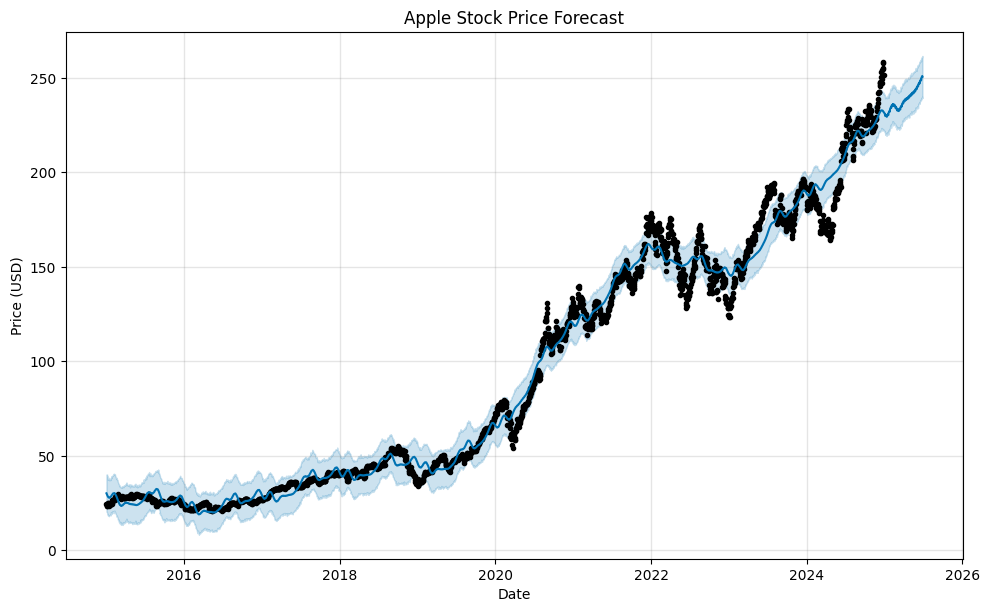

In [9]:
fig1 = model.plot(forecast)
plt.title('Apple Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

## Step 9: Visualize Forecast Components
Trend, weekly and yearly seasonality effects.

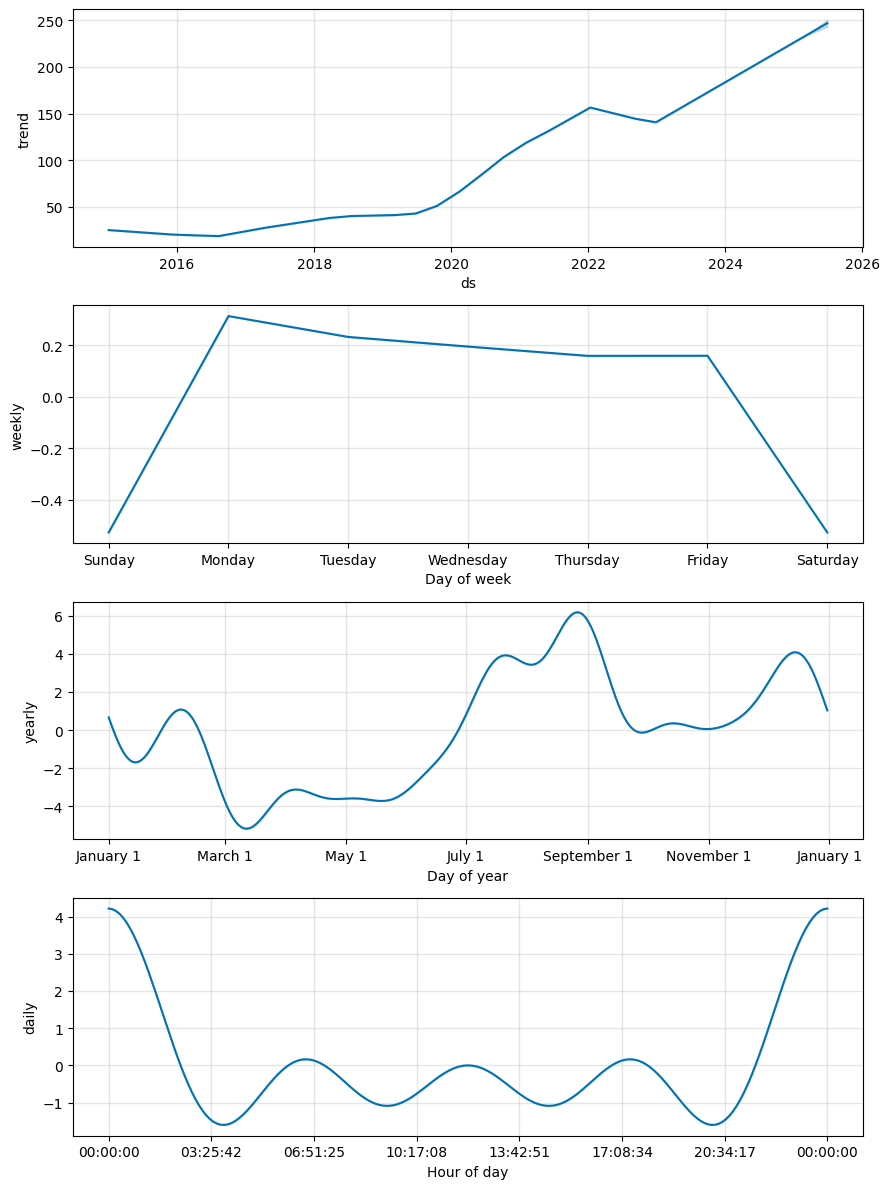

In [10]:
fig2 = model.plot_components(forecast)
plt.show()

## Optional: Save Forecast to CSV
You can save the forecasted data for further analysis.

In [11]:
forecast.to_csv('apple_stock_forecast.csv', index=False)